# Solutions to the Assessment Problems for Computer Infrastructure Module

In [11]:
#import pandas
import pandas as pd
#import yfinance package
import yfinance as yf
#import datetime
import datetime as dt
#import glob
import glob
#import os
import os
# import matplotlib
import matplotlib.pyplot as plt

## Problem 1: Data from yfinance

Create a function called `get_data` that takes the following parameters:
- `tickers`: A list of stock ticker symbols (e.g., ['AAPL', 'GOOG']).
- `start`: The start date for the data retrieval (default to 5 days ago from the current date).
- `end`: The end date for the data retrieval (default to the current date).
- `interval`: The data interval (default to '1h' for hourly data).

The function retrieves historical stock data for the specified tickers and date range using the yfinance package, and prints the first few rows of the retrieved data to the console.
The data is saved into a folder called *data* in the root of my repository to a CSV file using a filename with the format YYYYMMDD-HHmmss.csv.


For more  information on y-finance package, please visit the repository [link](https://github.com/ranaroussi/yfinance#history).
For more information on datetime package, please visit the documentation [link](https://docs.python.org/3/library/datetime.html).


In [8]:
# define function get_data()
def get_data(tickers, start = dt.datetime.now() - dt.timedelta(days=5), end = dt.datetime.now(), interval = "1h"):
    data = yf.download(tickers, start=start, end=end, interval=interval, auto_adjust=True)
    now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    print(data.head())
    data.to_csv("data/" + now + ".csv", sep = ",")


Use the function to get data for the five FAANG stocks with the following tickers:
- META (Facebook)
- AAPL (Apple)
- AMZN (Amazon)
- NFLX (Netflix)
- GOOG (Google)

In [9]:
get_data(['META', 'AAPL', 'AMZN', 'NFLX' , 'GOOG'])

[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-10-28 14:30:00+00:00  268.697205  227.550003  268.000000  754.349976   
2025-10-28 15:30:00+00:00  268.994995  229.110001  267.739990  751.965027   
2025-10-28 16:30:00+00:00  269.494995  230.690002  268.772705  756.109985   
2025-10-28 17:30:00+00:00  269.090210  230.052399  268.831787  754.802979   
2025-10-28 18:30:00+00:00  269.200012  230.368896  268.739990  753.734985   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-10-28 14:30:00+00:00  1103.260010  269.140015  227.880005  268.467194   
2025-10-28 15:30:00+00:00  1101.296143  269.075806  229.229996  268.160

https://mimo.org/glossary/python/datetime

## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png.

To retrieve CSV files in the directory I'll use [glob](https://www.geeksforgeeks.org/python/how-to-use-glob-function-to-find-files-recursively-in-python/) package.

In [15]:
#retrieve all csv files in data folder
list_of_files =glob.glob("data/*.csv")
print(list_of_files)

['data\\20251027-092927.csv', 'data\\20251027-093250.csv', 'data\\20251102-104439.csv', 'data\\20251102-104450.csv', 'data\\20251102-104534.csv']


To sort the files by modification time I'll use [os.path.getmtime](https://docs.python.org/3/library/os.path.html#os.path.getmtime).

In [16]:
#sort files by modification time
latest_file = max(list_of_files, key=os.path.getmtime)
print("Latest file is: ", latest_file)

Latest file is:  data\20251102-104534.csv


To create the plot with close prices of each stock I'll use [matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_api.html).

In [17]:
#import latest file into pandas dataframe
df = pd.read_csv(latest_file, header=[0,1], index_col=0, parse_dates=True)
#print dataframe head
print(df.head())

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-10-28 14:30:00+00:00  268.697205  227.550003  268.000000  754.349976   
2025-10-28 15:30:00+00:00  268.994995  229.110001  267.739990  751.965027   
2025-10-28 16:30:00+00:00  269.494995  230.690002  268.772705  756.109985   
2025-10-28 17:30:00+00:00  269.090210  230.052399  268.831787  754.802979   
2025-10-28 18:30:00+00:00  269.200012  230.368896  268.739990  753.734985   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-10-28 14:30:00+00:00  1103.260010  269.140015  227.880005  268.467194   
2025-10-28 15:30:00+00:00  1101.296143  269.075806  229.229996  268.160

In [18]:
# convert index to datetime
df.index = pd.to_datetime(df.index)

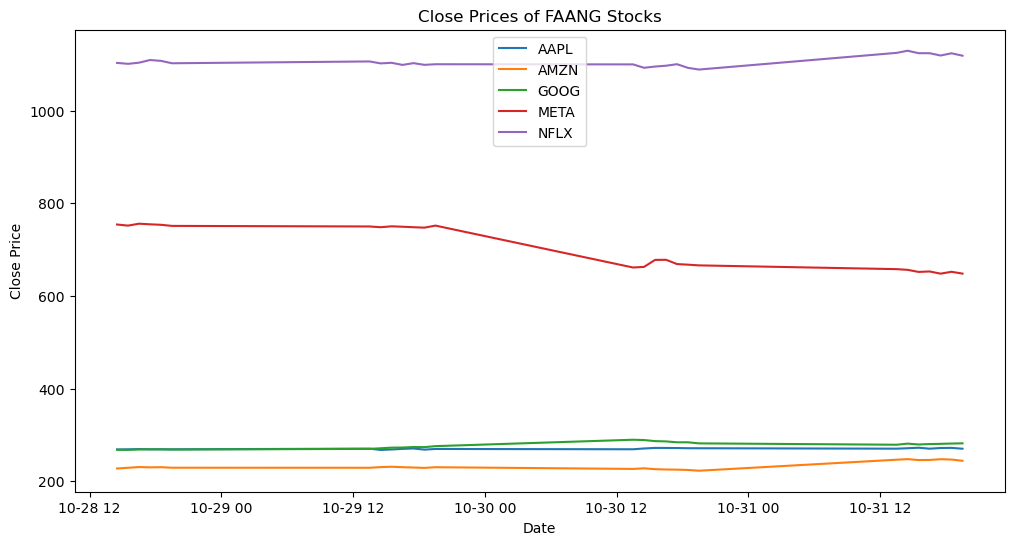

In [19]:
# plot close prices of each stock
plt.figure(figsize=(12,6))
for ticker in df['Close'].columns:
    plt.plot(df['Close'][ticker], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of FAANG Stocks')
plt.legend()
#save plot to plots folder
now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
plt.savefig("plots/" + now + ".png")
plt.show()

## Problem 3: Script

## Problem 4: Automation

## End